# 6. ICESat-2 ratiometric profiles

In [1]:
# import
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
from datetime import datetime
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from matplotlib import pyplot

In [2]:
icesat_all = gpd.read_file('..\\Data\\\ICESat2_polygons\\atl08_polygons.gpkg', layer='atl08_pol_species')


In [3]:
print('size with day: ', len(icesat_all.index))
icesat_all.head()

size with day:  265328


,track,seg,timestamp,year,month,beam_nr,beam_t,can_h,n_can_pho,n_topcan_pho,...,snow,brightness,cloud,urban,lon,lat,Hansen_sum,species_majority,species_variety,geometry
0,gt1l,670864,2.471818e+07,2018,10,6,weak,13.351807,22,4,...,0,0,3,0,550433.908225,6.599585e+06,2.0,16.0,2.0,"MULTIPOLYGON (((550432.385 6599635.257, 550444..."
1,gt1l,670914,2.471818e+07,2018,10,6,weak,21.750122,38,13,...,0,0,3,0,550344.254889,6.598588e+06,3.0,13.0,1.0,"MULTIPOLYGON (((550342.764 6598638.223, 550354..."
2,gt1l,670934,2.471818e+07,2018,10,6,weak,20.947483,36,5,...,0,0,3,0,550308.290920,6.598189e+06,2.0,13.0,1.0,"MULTIPOLYGON (((550306.807 6598239.494, 550318..."
3,gt1l,670939,2.471818e+07,2018,10,6,weak,22.216278,34,8,...,0,0,3,0,550299.464753,6.598089e+06,3.0,13.0,2.0,"MULTIPOLYGON (((550297.884 6598139.493, 550309..."
4,gt1l,670949,2.471818e+07,2018,10,6,weak,19.694645,36,6,...,0,0,3,0,550281.475630,6.597890e+06,2.0,0.0,2.0,"MULTIPOLYGON (((550279.998 6597940.345, 550291..."


# Histograms
The radiometric histograms provide insights forthe conditions explored (day versus night, clear versus cloud) but in the article were solely focused on nosnow scenarios. 

Note the distribution and mode.

Prepare dataframes for strong beam data:

In [11]:
strong_df_snow = icesat_all[icesat_all['beam_t'].eq('strong')]
strong_df = strong_df_snow[strong_df_snow['snow'].eq(0)]
strong_cloud = strong_df[strong_df['cloud'].gt(0)]
strong_clear = strong_df[strong_df['cloud'].eq(0)]
string_df.head()

,track,seg,timestamp,year,month,beam_nr,beam_t,can_h,n_can_pho,n_topcan_pho,...,snow,brightness,cloud,urban,lon,lat,Hansen_sum,species_majority,species_variety,geometry
11,gt1r,670824,2.471818e+07,2018,10,5,strong,15.402851,69,15,...,0,0,3,0,550516.347352,6.600382e+06,1.0,0.0,1.0,"MULTIPOLYGON (((550514.782 6600432.436, 550526..."
12,gt1r,670829,2.471818e+07,2018,10,5,strong,16.770412,55,19,...,0,0,3,0,550507.317478,6.600282e+06,1.0,0.0,2.0,"MULTIPOLYGON (((550505.838 6600332.436, 550517..."
13,gt1r,670874,2.471818e+07,2018,10,5,strong,11.893024,43,4,...,0,0,3,0,550426.853643,6.599385e+06,2.0,0.0,1.0,"MULTIPOLYGON (((550425.453 6599434.977, 550437..."
15,gt1r,670884,2.471818e+07,2018,10,5,strong,12.188364,50,13,...,0,0,3,0,550408.668903,6.599185e+06,3.0,0.0,1.0,"MULTIPOLYGON (((550407.139 6599235.393, 550419..."
16,gt1r,670889,2.471818e+07,2018,10,5,strong,22.224443,114,37,...,0,0,3,0,550400.058634,6.599085e+06,2.0,0.0,2.0,"MULTIPOLYGON (((550398.389 6599135.817, 550410..."


Prepare dataframes for weak beam data

In [12]:
weak_df_snow = icesat_all[icesat_all['beam_t'].eq('weak')]
weak_df = weak_df_snow[weak_df_snow['snow'].eq(0)]
weak_cloud = weak_df[weak_df['cloud'].gt(0)]
weak_clear = weak_df[weak_df['cloud'].eq(0)]
weak_df.head()

,track,seg,timestamp,year,month,beam_nr,beam_t,can_h,n_can_pho,n_topcan_pho,...,snow,brightness,cloud,urban,lon,lat,Hansen_sum,species_majority,species_variety,geometry
0,gt1l,670864,2.471818e+07,2018,10,6,weak,13.351807,22,4,...,0,0,3,0,550433.908225,6.599585e+06,2.0,16.0,2.0,"MULTIPOLYGON (((550432.385 6599635.257, 550444..."
1,gt1l,670914,2.471818e+07,2018,10,6,weak,21.750122,38,13,...,0,0,3,0,550344.254889,6.598588e+06,3.0,13.0,1.0,"MULTIPOLYGON (((550342.764 6598638.223, 550354..."
2,gt1l,670934,2.471818e+07,2018,10,6,weak,20.947483,36,5,...,0,0,3,0,550308.290920,6.598189e+06,2.0,13.0,1.0,"MULTIPOLYGON (((550306.807 6598239.494, 550318..."
3,gt1l,670939,2.471818e+07,2018,10,6,weak,22.216278,34,8,...,0,0,3,0,550299.464753,6.598089e+06,3.0,13.0,2.0,"MULTIPOLYGON (((550297.884 6598139.493, 550309..."
4,gt1l,670949,2.471818e+07,2018,10,6,weak,19.694645,36,6,...,0,0,3,0,550281.475630,6.597890e+06,2.0,0.0,2.0,"MULTIPOLYGON (((550279.998 6597940.345, 550291..."


## Plot histograms
Strong beam ground

ground strong beam clear day mode:  0.33
ground strong beam clear night mode:  0.31
ground strong beam cloudy day mode:  0.35
ground strong beam cloudy night mode:  0.66


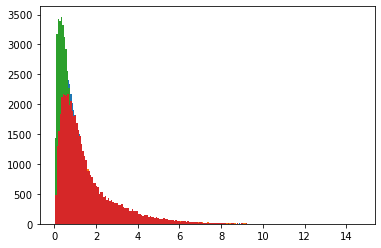

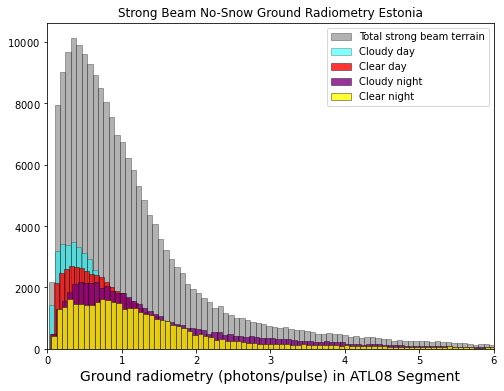

In [14]:
# find mode for clear day:
n, bins, patches = pyplot.hist(strong_clear[strong_clear['solar_el'].gt(0)]['ter_pho_rate'], bins=200)
ground_strong_clear_day_mode = round((bins[n.argmax()] + bins[n.argmax()+1])/2, 2)
print('ground strong beam clear day mode: ', ground_strong_clear_day_mode)

# find mode of clear night
n, bins, patches = pyplot.hist(strong_clear[strong_clear['solar_el'].lt(0)]['ter_pho_rate'], bins=200)
ground_strong_clear_night_mode = round((bins[n.argmax()] + bins[n.argmax()+1])/2, 2)
print('ground strong beam clear night mode: ', ground_strong_clear_night_mode)

# find mode for cloudy day:
n, bins, patches = pyplot.hist(strong_cloud[strong_cloud['solar_el'].gt(0)]['ter_pho_rate'], bins=200)
ground_strong_cloud_day_mode = round((bins[n.argmax()] + bins[n.argmax()+1])/2, 2)
print('ground strong beam cloudy day mode: ', ground_strong_cloud_day_mode)

# find mode of cloudy night
n, bins, patches = pyplot.hist(strong_cloud[strong_cloud['solar_el'].lt(0)]['ter_pho_rate'], bins=200)
ground_strong_cloud_night_mode = round((bins[n.argmax()] + bins[n.argmax()+1])/2, 2)
print('ground strong beam cloudy night mode: ', ground_strong_cloud_night_mode)

# combine strong terrain
pyplot.figure(figsize=(8,6))
pyplot.hist(strong_df['ter_pho_rate'], bins=200, alpha=0.6, label="Total strong beam terrain", color = 'grey', edgecolor='black', linewidth=0.5)
pyplot.hist(strong_cloud[strong_cloud['solar_el'].gt(0)]['ter_pho_rate'], bins=200, alpha=0.5, label="Cloudy day", color = 'cyan', edgecolor='black', linewidth=0.5)
pyplot.hist(strong_clear[strong_clear['solar_el'].gt(0)]['ter_pho_rate'], bins=200, alpha=0.8, label="Clear day", color = 'red', edgecolor='black', linewidth=0.5)

pyplot.hist(strong_cloud[strong_cloud['solar_el'].lt(0)]['ter_pho_rate'], bins=200, alpha=0.8, label="Cloudy night", color = 'purple', edgecolor='black', linewidth=0.5)

pyplot.hist(strong_clear[strong_clear['solar_el'].lt(0)]['ter_pho_rate'], bins=200, alpha=0.8, label="Clear night", color = 'yellow', edgecolor='black', linewidth=0.5)


pyplot.xlabel("Ground radiometry (photons/pulse) in ATL08 Segment", size=14)
pyplot.ticklabel_format(axis = 'y', style = 'plain', useMathText = True)
pyplot.xlim([0, 6])
pyplot.title("Strong Beam No-Snow Ground Radiometry Estonia")
pyplot.legend(loc='upper right')
#pyplot.savefig('plots\\radiometry_histograms\\Strong_Beam_Ground_Radiometry.png')

Weak beam ground

ground weak beam clear day mode:  0.07
ground weak beam clear night mode:  1.01
ground weak beam cloudy day mode:  0.07
ground weak beam cloudy night mode:  1.17


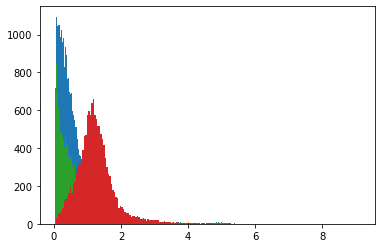

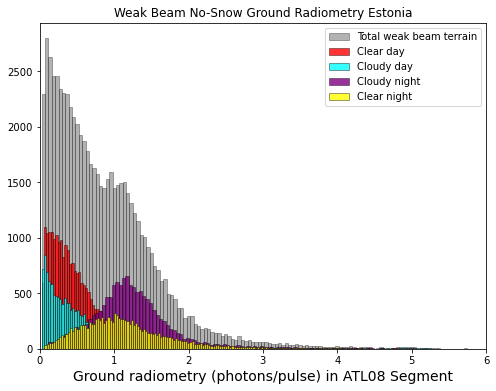

In [15]:
# find mode for clear day:
n, bins, patches = pyplot.hist(weak_clear[weak_clear['solar_el'].gt(0)]['ter_pho_rate'], bins=200)
ground_weak_clear_day_mode = round((bins[n.argmax()] + bins[n.argmax()+1])/2, 2)
print('ground weak beam clear day mode: ', ground_weak_clear_day_mode)

# find mode of clear night
n, bins, patches = pyplot.hist(weak_clear[weak_clear['solar_el'].lt(0)]['ter_pho_rate'], bins=200)
ground_weak_clear_night_mode = round((bins[n.argmax()] + bins[n.argmax()+1])/2, 2)
print('ground weak beam clear night mode: ', ground_weak_clear_night_mode)

# find mode for cloudy day:
n, bins, patches = pyplot.hist(weak_cloud[weak_cloud['solar_el'].gt(0)]['ter_pho_rate'], bins=200)
ground_weak_cloud_day_mode = round((bins[n.argmax()] + bins[n.argmax()+1])/2, 2)
print('ground weak beam cloudy day mode: ', ground_weak_cloud_day_mode)

# find mode of cloudy night
n, bins, patches = pyplot.hist(weak_cloud[weak_cloud['solar_el'].lt(0)]['ter_pho_rate'], bins=200)
ground_weak_cloud_night_mode = round((bins[n.argmax()] + bins[n.argmax()+1])/2, 2)
print('ground weak beam cloudy night mode: ', ground_weak_cloud_night_mode)

# weak beam ground radiometry
pyplot.figure(figsize=(8,6))
pyplot.hist(weak_df['ter_pho_rate'], bins=200, alpha=0.6, label="Total weak beam terrain", color = 'grey', edgecolor='black', linewidth=0.5)
pyplot.hist(weak_clear[weak_clear['solar_el'].gt(0)]['ter_pho_rate'], bins=200, alpha=0.8, label="Clear day", color = 'red', edgecolor='black', linewidth=0.5)
pyplot.hist(weak_cloud[weak_cloud['solar_el'].gt(0)]['ter_pho_rate'], bins=200, alpha=0.8, label="Cloudy day", color = 'cyan', edgecolor='black', linewidth=0.5)
pyplot.hist(weak_cloud[weak_cloud['solar_el'].lt(0)]['ter_pho_rate'], bins=200, alpha=0.8, label="Cloudy night", color = 'purple', edgecolor='black', linewidth=0.5)
pyplot.hist(weak_clear[weak_clear['solar_el'].lt(0)]['ter_pho_rate'], bins=200, alpha=0.8, label="Clear night", color = 'yellow', edgecolor='black', linewidth=0.5)
pyplot.xlabel("Ground radiometry (photons/pulse) in ATL08 Segment", size=14)
pyplot.xlim([0, 6])
pyplot.title("Weak Beam No-Snow Ground Radiometry Estonia")
pyplot.legend(loc='upper right')
#pyplot.savefig('plots\\radiometry_histograms\\Weak_Beam_Ground_Radiometry.png')

Strong beam canopy

canopy strong beam clear day mode:  1.17
canopy strong beam clear night mode:  0.98
canopy strong beam cloudy day mode:  0.75
canopy strong beam cloudy night mode:  0.99


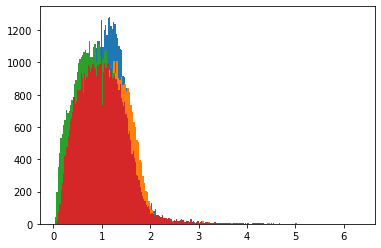

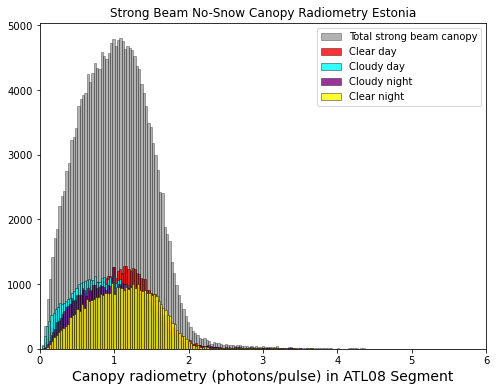

In [10]:
# find mode for clear day:
n, bins, patches = pyplot.hist(strong_clear[strong_clear['solar_el'].gt(0)]['can_pho_rate'], bins=200)
canopy_strong_clear_day_mode = round((bins[n.argmax()] + bins[n.argmax()+1])/2, 2)
print('canopy strong beam clear day mode: ', canopy_strong_clear_day_mode)

# find mode of clear night
n, bins, patches = pyplot.hist(strong_clear[strong_clear['solar_el'].lt(0)]['can_pho_rate'], bins=200)
canopy_strong_clear_night_mode = round((bins[n.argmax()] + bins[n.argmax()+1])/2, 2)
print('canopy strong beam clear night mode: ', canopy_strong_clear_night_mode)

# find mode for cloudy day:
n, bins, patches = pyplot.hist(strong_cloud[strong_cloud['solar_el'].gt(0)]['can_pho_rate'], bins=200)
canopy_strong_cloud_day_mode = round((bins[n.argmax()] + bins[n.argmax()+1])/2, 2)
print('canopy strong beam cloudy day mode: ', canopy_strong_cloud_day_mode)

# find mode of cloudy night
n, bins, patches = pyplot.hist(strong_cloud[strong_cloud['solar_el'].lt(0)]['can_pho_rate'], bins=200)
canopy_strong_cloud_night_mode = round((bins[n.argmax()] + bins[n.argmax()+1])/2, 2)
print('canopy strong beam cloudy night mode: ', canopy_strong_cloud_night_mode)

# strong beam canopy radiometry
pyplot.figure(figsize=(8,6))
pyplot.hist(strong_df['can_pho_rate'], bins=200, alpha=0.6, label="Total strong beam canopy", color = 'grey', edgecolor='black', linewidth=0.5)
pyplot.hist(strong_clear[strong_clear['solar_el'].gt(0)]['can_pho_rate'], bins=200, alpha=0.8, label="Clear day", color = 'red', edgecolor='black', linewidth=0.5)
pyplot.hist(strong_cloud[strong_cloud['solar_el'].gt(0)]['can_pho_rate'], bins=200, alpha=0.8, label="Cloudy day", color = 'cyan', edgecolor='black', linewidth=0.5)
pyplot.hist(strong_cloud[strong_cloud['solar_el'].lt(0)]['can_pho_rate'], bins=200, alpha=0.8, label="Cloudy night", color = 'purple', edgecolor='black', linewidth=0.5)
pyplot.hist(strong_clear[strong_clear['solar_el'].lt(0)]['can_pho_rate'], bins=200, alpha=0.8, label="Clear night", color = 'yellow', edgecolor='black', linewidth=0.5)
pyplot.xlabel("Canopy radiometry (photons/pulse) in ATL08 Segment", size=14)
pyplot.xlim([0, 6])
pyplot.title("Strong Beam No-Snow Canopy Radiometry Estonia")
pyplot.legend(loc='upper right')
#pyplot.savefig('plots\\radiometry_histograms\\Strong_Beam_Canopy_Radiometry.png')

Weak beam canopy

canopy weak beam clear day mode:  0.52
canopy weak beam clear night mode:  0.38
canopy weak beam cloudy day mode:  0.59
canopy weak beam cloudy night mode:  0.48


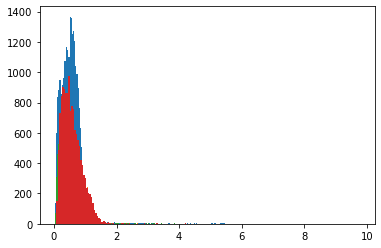

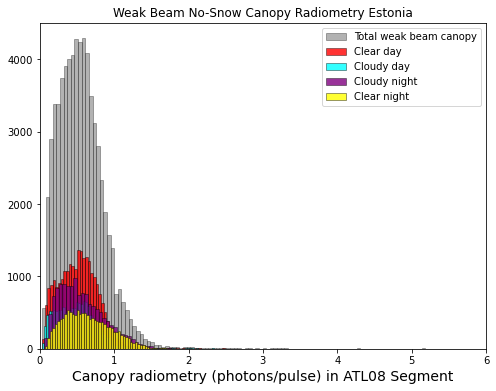

In [16]:
# find mode for clear day:
n, bins, patches = pyplot.hist(weak_clear[weak_clear['solar_el'].gt(0)]['can_pho_rate'], bins=200)
canopy_weak_clear_day_mode = round((bins[n.argmax()] + bins[n.argmax()+1])/2, 2)
print('canopy weak beam clear day mode: ', canopy_weak_clear_day_mode)

# find mode of clear night
n, bins, patches = pyplot.hist(weak_clear[weak_clear['solar_el'].lt(0)]['can_pho_rate'], bins=200)
canopy_weak_clear_night_mode = round((bins[n.argmax()] + bins[n.argmax()+1])/2, 2)
print('canopy weak beam clear night mode: ', canopy_weak_clear_night_mode)

# find mode for cloudy day:
n, bins, patches = pyplot.hist(weak_cloud[weak_cloud['solar_el'].gt(0)]['can_pho_rate'], bins=200)
canopy_weak_cloud_day_mode = round((bins[n.argmax()] + bins[n.argmax()+1])/2, 2)
print('canopy weak beam cloudy day mode: ', canopy_weak_cloud_day_mode)

# find mode of cloudy night
n, bins, patches = pyplot.hist(weak_cloud[weak_cloud['solar_el'].lt(0)]['can_pho_rate'], bins=200)
canopy_weak_cloud_night_mode = round((bins[n.argmax()] + bins[n.argmax()+1])/2, 2)
print('canopy weak beam cloudy night mode: ', canopy_weak_cloud_night_mode)


# weak beam canopy radiometry
pyplot.figure(figsize=(8,6))
pyplot.hist(weak_df['can_pho_rate'], bins=200, alpha=0.6, label="Total weak beam canopy", color = 'grey', edgecolor='black', linewidth=0.5)
pyplot.hist(weak_clear[weak_clear['solar_el'].gt(0)]['can_pho_rate'], bins=200, alpha=0.8, label="Clear day", color = 'red', edgecolor='black', linewidth=0.5)
pyplot.hist(weak_cloud[weak_cloud['solar_el'].gt(0)]['can_pho_rate'], bins=200, alpha=0.8, label="Cloudy day", color = 'cyan', edgecolor='black', linewidth=0.5)
pyplot.hist(weak_cloud[weak_cloud['solar_el'].lt(0)]['can_pho_rate'], bins=200, alpha=0.8, label="Cloudy night", color = 'purple', edgecolor='black', linewidth=0.5)
pyplot.hist(weak_clear[weak_clear['solar_el'].lt(0)]['can_pho_rate'], bins=200, alpha=0.8, label="Clear night", color = 'yellow', edgecolor='black', linewidth=0.5)
pyplot.xlabel("Canopy radiometry (photons/pulse) in ATL08 Segment", size=14)
pyplot.xlim([0, 6])
pyplot.title("Weak Beam No-Snow Canopy Radiometry Estonia")
pyplot.legend(loc='upper right')
#pyplot.savefig('plots\\radiometry_histograms\\Weak_Beam_Canopy_Radiometry.png')

In [12]:
cols = pd.MultiIndex.from_tuples([("Ground", "Strong"), 
                                  ("Ground", "Weak"), 
                                  ("Canopy", "Strong"),
                                  ("Canopy", "Weak")])
averages = [(ground_strong_clear_day_mode + ground_weak_clear_day_mode + canopy_strong_clear_day_mode + canopy_weak_clear_day_mode)/4,\
(ground_strong_clear_night_mode + ground_weak_clear_night_mode + canopy_strong_clear_night_mode + canopy_weak_clear_night_mode)/4,\
(ground_strong_cloud_day_mode + ground_weak_cloud_day_mode + canopy_strong_cloud_day_mode + canopy_weak_cloud_day_mode)/4,\
(ground_strong_cloud_night_mode + ground_weak_cloud_night_mode + canopy_strong_cloud_night_mode + canopy_weak_cloud_night_mode)/4]


data=[[ground_strong_clear_day_mode, ground_weak_clear_day_mode, canopy_strong_clear_day_mode, canopy_weak_clear_day_mode], \
      [ground_strong_clear_night_mode, ground_weak_clear_night_mode, canopy_strong_clear_night_mode, canopy_weak_clear_night_mode],\
    [ground_strong_cloud_day_mode,  ground_weak_cloud_day_mode, canopy_strong_cloud_day_mode, canopy_weak_cloud_day_mode],\
      [ground_strong_cloud_night_mode, ground_weak_cloud_night_mode, canopy_strong_cloud_night_mode, canopy_weak_cloud_night_mode]]

ind = ['Clear day', 'Clear night', 'Cloudy day', 'Cloudy night']
table = pd.DataFrame(data, columns=cols, index = ind)
print(table, '\n\n', averages)


             Ground       Canopy      
             Strong  Weak Strong  Weak
Clear day      0.33  0.07   1.17  0.52
Clear night    0.31  1.01   0.98  0.38
Cloudy day     0.35  0.07   0.75  0.59
Cloudy night   0.66  1.17   0.99  0.48 

 [0.5225, 0.6699999999999999, 0.43999999999999995, 0.8250000000000001]


# Radiometric profile

Clear August night all beams:
Mean squared error: 0.36
Coefficient of determination: -0.76


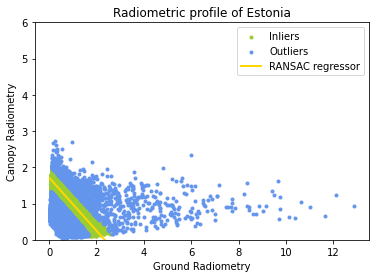

In [5]:
# August all beams clear night
augustnight = icesat_all[icesat_all['month'].eq('08')]
augustnight = augustnight[augustnight['cloud'].eq(0)]


x = augustnight['ter_pho_rate'].values
x = x.reshape(x.size, 1)
y = augustnight['can_pho_rate'].values
y = y.reshape(y.size, 1)


# Fit line using all data
lr = linear_model.LinearRegression()
lr.fit(x, y)

# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(x, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

X = x

# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

lw = 2
pyplot.scatter(X[inlier_mask], y[inlier_mask], color="yellowgreen", marker=".", label="Inliers")

pyplot.scatter(X[outlier_mask], y[outlier_mask], color="cornflowerblue", marker=".", label="Outliers")


pyplot.plot(
    line_X,
    line_y_ransac,
    color="gold",
    linewidth=lw,
    label="RANSAC regressor",
)

pyplot.legend(loc="upper right")

plt.xlabel("Ground Radiometry")
plt.ylabel("Canopy Radiometry")
plt.title('Radiometric profile of Estonia')
pyplot.ylim([0, 6])
pyplot#.show()
print("Clear August night all beams:")
# The mean squared error
print("Mean squared error: %.2f" % metrics.mean_squared_error(y, ransac.predict(x)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % metrics.r2_score(y, ransac.predict(x)))
#pyplot.savefig('plots\\radiometry_profiles\\radiometric_prof_Augustnight_all_beams.png')